# Programming Assignment

## CNN classifier for the MNIST dataset

In [ ]:
# import all required packages

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

![MNIST overview image](https://camo.githubusercontent.com/7e3e2aec115b52781444fa9cbe44b5ced6d6dccd5f25d3f03b2ec7708243534f/68747470733a2f2f6b6e6f776d2e6f72672f77702d636f6e74656e742f75706c6f6164732f53637265656e2d53686f742d323031352d30382d31342d61742d322e34342e35372d504d2e706e67)

#### The MNIST dataset

In this assignment, you will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). It consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models. 

- Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner. "Gradient-based learning applied to document recognition." Proceedings of the IEEE, 86(11):2278-2324, November 1998.

Your goal is to construct a neural network that classifies images of handwritten digits into one of 10 classes.

#### Load and preprocess the data

In [ ]:
# load the MNIST data

mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11501568/11490434 [==============================] - 0s 0us/step


First, preprocess the data by scaling the training and test images so their values lie in the range from 0 to 1.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
uniq_train_images = np.unique(train_images)
uniq_train_images 

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [ ]:
max_train_images = np.ndarray.max(train_images)
print(max_train_images)
min_train_images = np.ndarray.min(train_images)
print(min_train_images)

255
0


In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
max_test_images = np.ndarray.max(test_images)
print(max_test_images)
min_test_images = np.ndarray.min(test_images)
print(min_test_images)

255
0


In [ ]:
float(np.ndarray.max(train_images))

255.0

In [ ]:
def scale_mnist_data(train_images, test_images):
    """
    This function takes in the training and test images as loaded in the cell above, and scales them
    so that they have minimum and maximum values equal to 0 and 1 respectively.
    Your function should return a tuple (train_images, test_images) of scaled training and test images.
    """
    return (train_images/float(np.ndarray.max(train_images)),test_images/float(np.ndarray.max(test_images)))

In [ ]:
scaled_train_images, scaled_test_images = scale_mnist_data(train_images, test_images)

In [ ]:
scaled_train_images.shape

(60000, 28, 28)

In [ ]:
scaled_train_images[..., np.newaxis].shape

(60000, 28, 28, 1)

In [ ]:
scaled_train_images = scaled_train_images[..., np.newaxis]
scaled_test_images = scaled_test_images[..., np.newaxis]

#### Build the convolutional neural network model

Using the Sequential API, build your CNN model according to the following spec:

* The model should use the `input_shape` in the function argument to set the input size in the first layer.
* A 2D convolutional layer with a 3x3 kernel and 8 filters. Use 'SAME' zero padding and ReLU activation functions. Make sure to provide the `input_shape` keyword argument in this first layer.
* A max pooling layer, with a 2x2 window, and default strides.
* A flatten layer, which unrolls the input into a one-dimensional tensor.
* Two dense hidden layers, each with 64 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

In particular, the neural network should have six layers.

In [ ]:
def get_model(input_shape):
    """
    This function should build a Sequential model according to the above specification. Ensure the 
    weights are initialised by providing the input_shape argument in the first layer, given by the
    function argument.
    Your function should return the model.
    """

    model = Sequential([
                    Conv2D(8, (3,3), padding='SAME', activation='relu', 
                           input_shape=input_shape),
                    MaxPooling2D((2,2)),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')
                    ])
    
    return model

In [ ]:
scaled_train_images[0].shape

(28, 28, 1)

In [ ]:
model = get_model(scaled_train_images[0].shape)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1568)              0         
                                                                 
 dense (Dense)               (None, 64)                100416    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                        

#### Compile the model

In [ ]:
def compile_model(model):
    """
    This function takes in the model returned from your get_model function, and compiles it with an optimiser,
    loss function and metric.
    Compile the model using the Adam optimiser (with default settings), the cross-entropy loss function and
    accuracy as the only metric. 
    Your function doesn't need to return anything; the model will be compiled in-place.
    """
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
        )

In [ ]:
compile_model(model)

#### Fit the model to the training data

In [ ]:
def train_model(model, scaled_train_images, train_labels):
    """
    This function should train the model for 5 epochs on the scaled_train_images and train_labels. 
    Your function should return the training history, as returned by model.fit.
    """
    history = model.fit(
        scaled_train_images,
        train_labels,
        epochs = 5,
        batch_size=32, 
        verbose=2
    )

    return history

In [ ]:
history = train_model(model, scaled_train_images, train_labels)

Epoch 1/5
1875/1875 - 20s - loss: 0.2117 - accuracy: 0.9373 - 20s/epoch - 11ms/step
Epoch 2/5
1875/1875 - 20s - loss: 0.0791 - accuracy: 0.9757 - 20s/epoch - 11ms/step
Epoch 3/5
1875/1875 - 20s - loss: 0.0556 - accuracy: 0.9829 - 20s/epoch - 10ms/step
Epoch 4/5
1875/1875 - 20s - loss: 0.0422 - accuracy: 0.9866 - 20s/epoch - 10ms/step
Epoch 5/5
1875/1875 - 19s - loss: 0.0322 - accuracy: 0.9894 - 19s/epoch - 10ms/step


In [ ]:
type(history)

keras.callbacks.History

In [ ]:
epochs = 5 # need to define outside the function the number of epochs used for training
print(f"The loss of the training equals to {history.history['loss'][epochs-1]:.03f}.")
print(f"The accuracy of the training equals to {history.history['accuracy'][epochs-1]:.03f}.")

The loss of the training equals to 0.032.
The accuracy of the training equals to 0.989.


#### Plot the learning curves

* Epoch vs accuracy
* Epoch vs loss


In [ ]:
frame = pd.DataFrame(history.history)

In [ ]:
frame.shape

(5, 2)

In [ ]:
frame.columns

Index(['loss', 'accuracy'], dtype='object')

In [ ]:
frame

,loss,accuracy
0,0.211652,0.937283
1,0.079139,0.975733
2,0.055636,0.982850
3,0.042247,0.986600
4,0.032151,0.989400


In [ ]:
frame.loc[frame.shape[0]-1]

loss        0.032151
accuracy    0.989400
Name: 4, dtype: float64

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

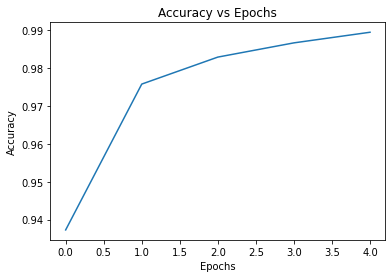

In [ ]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

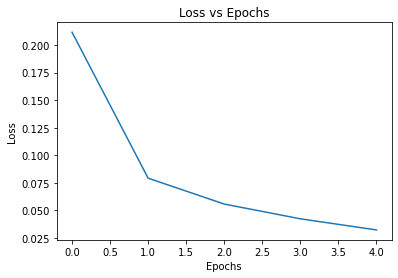

In [ ]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

#### Evaluate the model

Finally, you should evaluate the performance of your model on the test set, by calling the model's `evaluate` method.

In [ ]:
def evaluate_model(model, scaled_test_images, test_labels):
    """
    This function should evaluate the model on the scaled_test_images and test_labels. 
    Your function should return a tuple (test_loss, test_accuracy).
    """
    test_loss, test_accuracy = model.evaluate(scaled_test_images, test_labels, verbose=2)

    return (test_loss, test_accuracy)

In [ ]:
test_loss, test_accuracy = evaluate_model(model, scaled_test_images, test_labels)
print(f"Test loss: {test_loss:.03f}.")
print(f"Test accuracy: {test_accuracy:.03f}.")

313/313 - 2s - loss: 0.0544 - accuracy: 0.9831 - 2s/epoch - 6ms/step
Test loss: 0.054.
Test accuracy: 0.983.


#### Model predictions


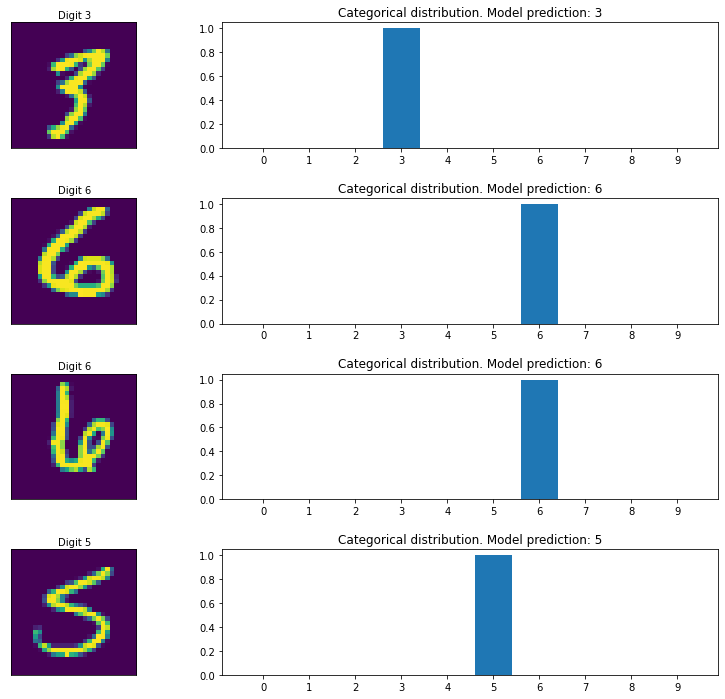

In [ ]:
num_test_images = scaled_test_images.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = scaled_test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()